# Import Library

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [3]:
link = "https://raw.githubusercontent.com/jaiyesh/diploma_ml_oandg/main/Day%2020%20material%20Machine%20Learning%20and%20Assignment/Volve%20P-12_DatesCorrected.csv"
df = pd.read_csv(link)

In [4]:
df.head()

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3291 non-null   object 
 1   onstreaminject_HRS              3291 non-null   float64
 2   BORE_WI_VOL                     3291 non-null   int64  
 3   ON_STREAM_HRS                   3291 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 6   AVG_DP_TUBING                   3291 non-null   float64
 7   AVG_ANNULUS_PRESS               3291 non-null   float64
 8   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 9   AVG_WHP_P                       3291 non-null   float64
 10  AVG_WHT_P                       3291 non-null   float64
 11  DP_CHOKE_SIZE                   3291 non-null   float64
 12  BORE_OIL_VOL                    32

# Data Cleaning

### Rename Columns

In [6]:
df.rename(columns = {'Unnamed: 0':'DATE'}, inplace = True)

### Convert Date

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

### Set Date to Index

In [8]:
df.index = df['DATE']
df.drop('DATE', axis = 1, inplace = True)

### Check Missing Value and Duplicate

In [9]:
df.duplicated().sum()

153

In [10]:
df.isna().sum()

onstreaminject_HRS                0
BORE_WI_VOL                       0
ON_STREAM_HRS                     0
AVG_DOWNHOLE_PRESSURE             0
AVG_DOWNHOLE_TEMPERATURE          0
AVG_DP_TUBING                     0
AVG_ANNULUS_PRESS                 0
AVG_CHOKE_SIZE_P in percentage    0
AVG_WHP_P                         0
AVG_WHT_P                         0
DP_CHOKE_SIZE                     0
BORE_OIL_VOL                      0
BORE_GAS_VOL                      0
BORE_WAT_VOL                      0
dtype: int64

isnt any missing value and no duplicate

In [11]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATE,,,,,,,,,,,,,,
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


# Exploratory Data Analysis

## Visualization for AVG_DOWNHOLE_TEMPERATURE

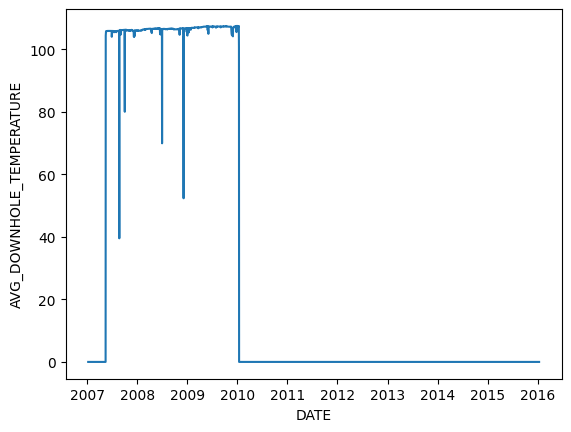

In [12]:
sns.lineplot(x='DATE', y='AVG_DOWNHOLE_TEMPERATURE', data=df)
plt.show()

Can we see that AVG_DOWNHOLE_TEMPERATURE for several months in 2007 and after the year 2010 is all 0, but the data for the year 2010 is for prediction? However, the data for several months in 2007 cannot be included in the training model because it is all 0

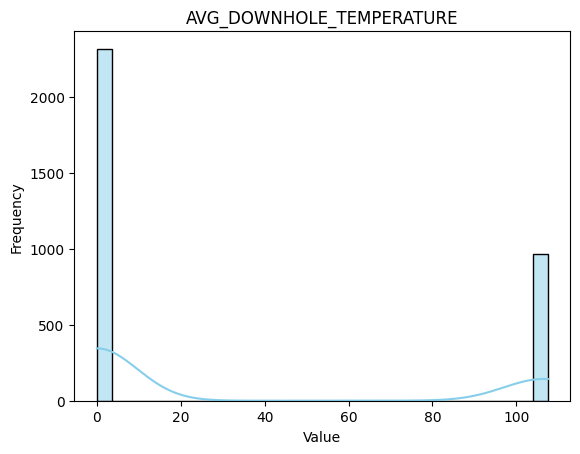

In [13]:
sns.histplot(df['AVG_DOWNHOLE_TEMPERATURE'], bins=30, kde=True, color='skyblue')

plt.title('AVG_DOWNHOLE_TEMPERATURE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Let's see that the histogram is dominated by temperatures of 0 and >100. However, to observe other distributions, we can exclude temperatures of 0 first.

### Plot each column in a subplot

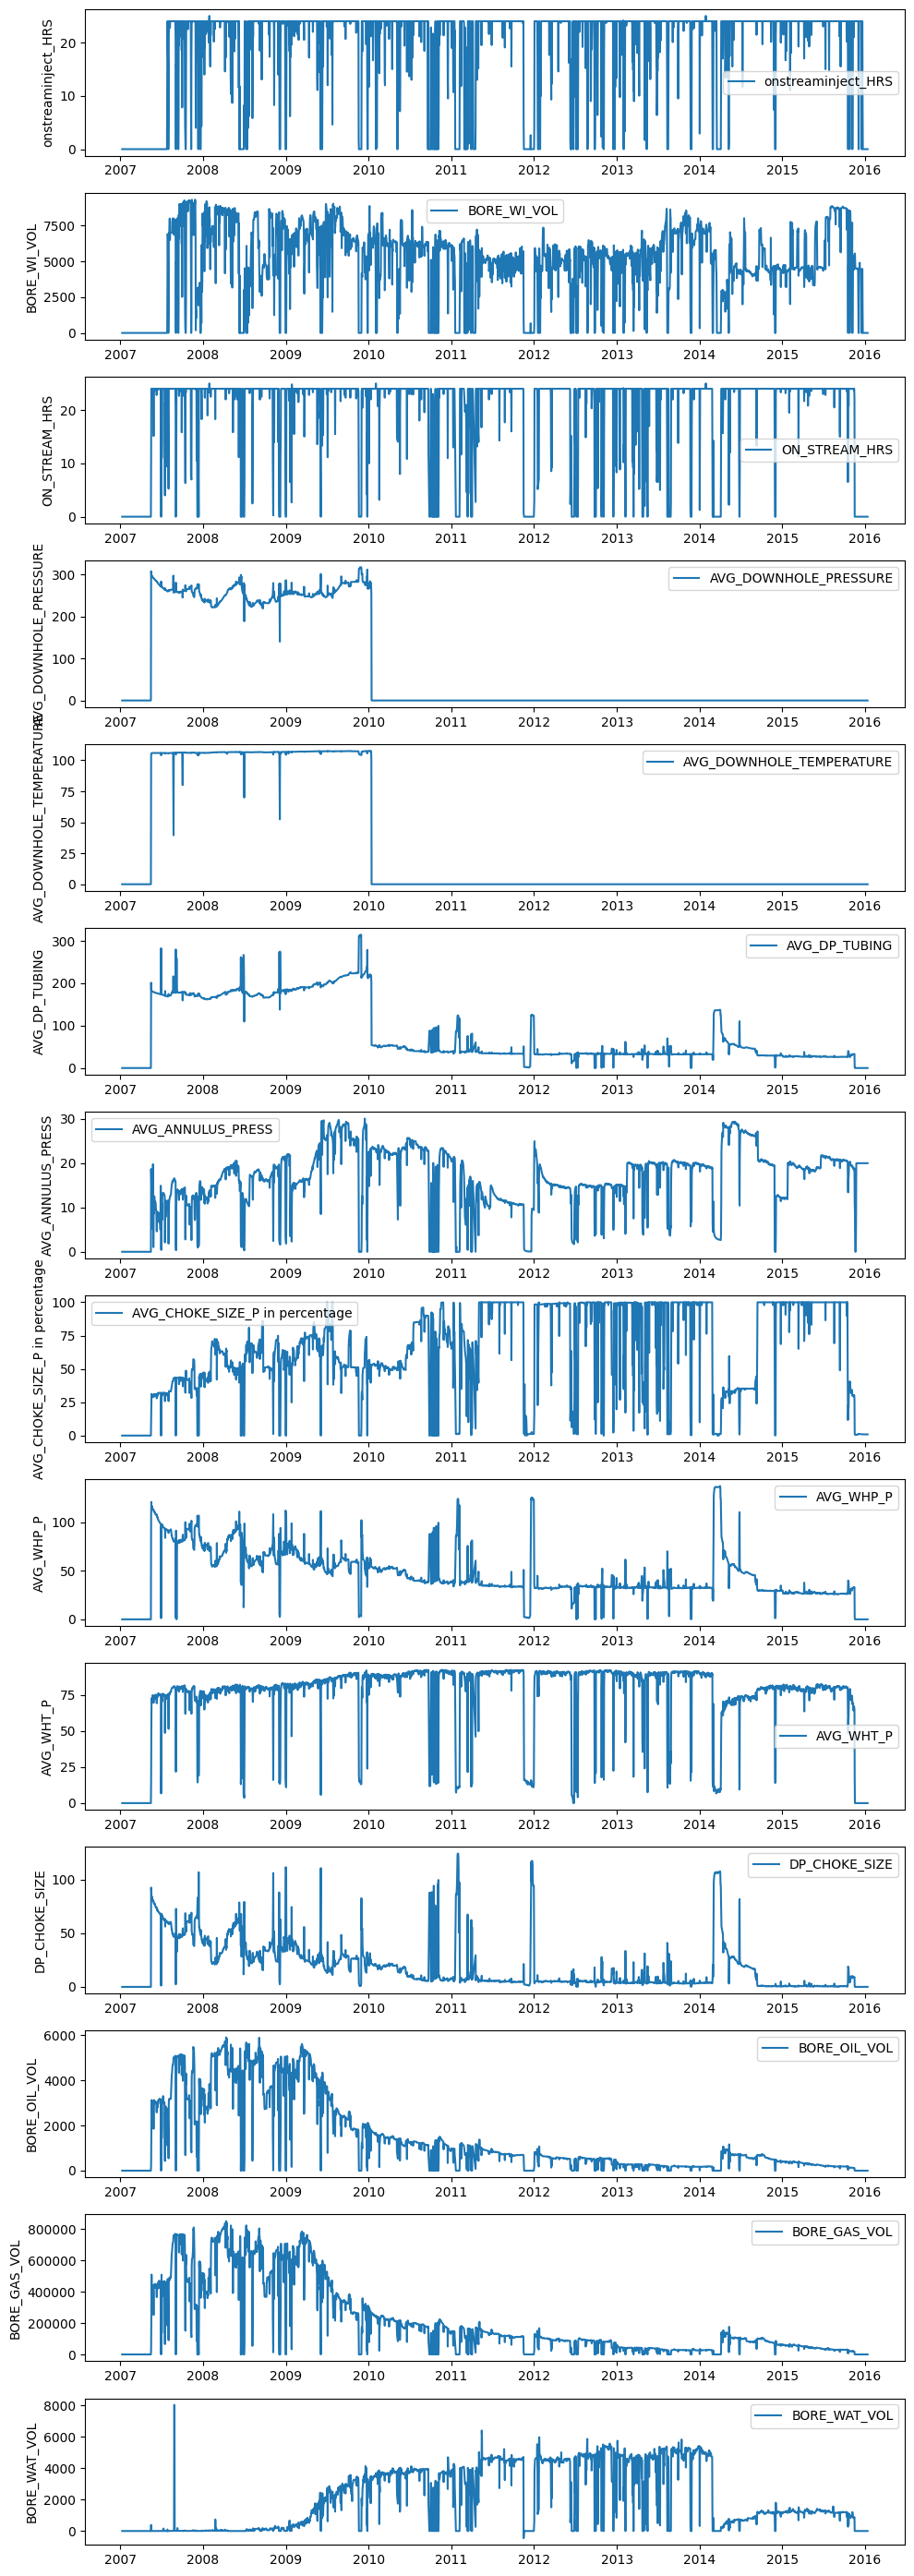

In [14]:
columns_to_plot = df.columns
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 2*len(columns_to_plot)))

# Plot each column in a subplot
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df.index, df[column], label=column)
    axes[i].set_ylabel(column)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

We can see that AVG_DOWNHOLE_PRESSURE cannot be used because it contains zeros in the year we are predicting, making it useless for modeling later.

### Filter AVG_DOWNHOLE_TEMPERATURE

In [15]:
df_eda = df.copy()
df_eda = df_filtered = df[df['AVG_DOWNHOLE_TEMPERATURE'] != 0]

Removing the value 0 to avoid disrupting the modeling process later.

In [16]:
df_eda.head(3)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATE,,,,,,,,,,,,,,
2007-05-17,0.0,0,11.5,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
2007-05-18,0.0,0,24.0,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2007-05-19,0.0,0,22.5,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0


Text(0.5, 0, 'AVG_DOWNHOLE_TEMPERATURE')

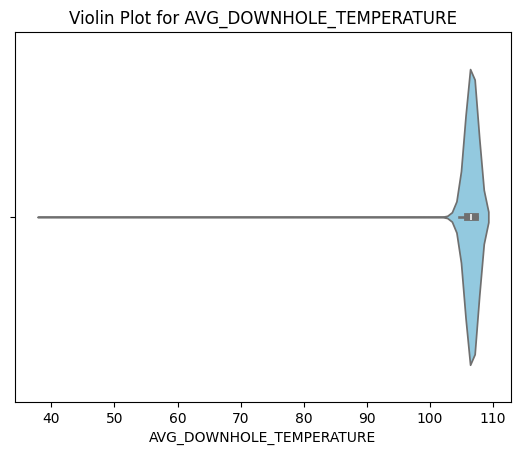

In [17]:
sns.violinplot(x=df_eda['AVG_DOWNHOLE_TEMPERATURE'], color='skyblue')

# Add labels and title
plt.title('Violin Plot for AVG_DOWNHOLE_TEMPERATURE')
plt.xlabel('AVG_DOWNHOLE_TEMPERATURE')

From the plot, we can see that the distribution of AVG_DOWNHOLE_TEMPERATURE is around 100-110.

## Feature Analysis

In [18]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
onstreaminject_HRS,973.0,19.652867,8.492170,0.000,21.50000,24.00000,24.00000,25.00000
BORE_WI_VOL,973.0,5822.278520,2930.063657,0.000,4151.00000,6852.00000,8125.00000,9316.00000
ON_STREAM_HRS,973.0,22.098176,5.606652,0.000,24.00000,24.00000,24.00000,25.00000
AVG_DOWNHOLE_PRESSURE,973.0,258.014249,19.765278,140.256,245.86600,257.78100,271.60100,317.70100
AVG_DOWNHOLE_TEMPERATURE,973.0,106.287758,3.495929,39.554,106.09700,106.58800,107.09500,107.50800
AVG_DP_TUBING,973.0,188.097071,23.937766,109.578,172.49100,179.88500,197.65900,314.40900
AVG_ANNULUS_PRESS,973.0,16.876531,6.668048,0.000,12.93000,16.27800,20.71600,30.02000
AVG_CHOKE_SIZE_P in percentage,973.0,52.490172,17.878704,0.000,42.98479,51.76695,64.94339,99.99982
AVG_WHP_P,973.0,69.867154,19.079318,0.000,57.87900,66.35400,81.95400,120.88900
AVG_WHT_P,973.0,77.344042,14.560796,3.676,77.02200,80.22500,82.95600,92.07100


We can see that the data has different units. Scaling the data is necessary to standardize it and eliminate unit differences and outliers.

### Correlation Matrix

Text(0.5, 1.0, 'Triangle Matrix Correlation Plot')

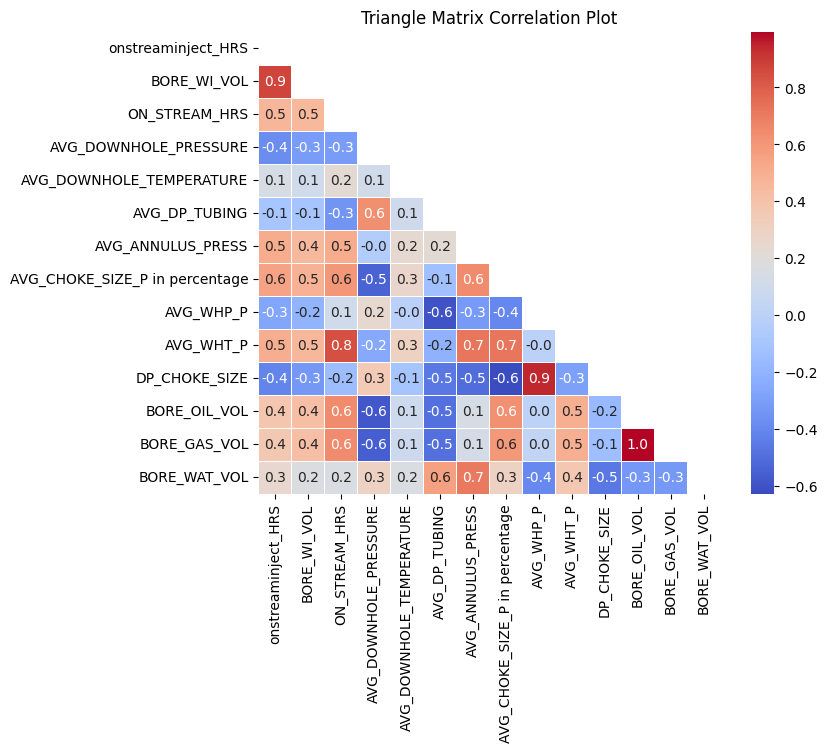

In [19]:
corr_matrix = df_eda.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".1f", square=True, linewidths=.5, ax=ax,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title("Triangle Matrix Correlation Plot")

We can see that AVG_DOWNHOLE_TEMPERATURE does not have a correlation with DP_CHOKE_SIZE and AVG_WHP_P.

# Feature Engineering and Modelling

### Split data test and data train

In [20]:
feature_columns = df_eda.columns.difference(['DP_CHOKE_SIZE', 'AVG_WHP_P',"AVG_DOWNHOLE_TEMPERATURE","AVG_DOWNHOLE_PRESSURE"])
target_columns = "AVG_DOWNHOLE_TEMPERATURE"

In [21]:
train_data = df_eda[(df_eda.index.year < 2010)]
test_data = df_eda[(df_eda.index.year == 2010) & (df_eda.index.month == 1)]

X_train = train_data[feature_columns]
y_train = train_data[target_columns]

X_test = test_data[feature_columns]
y_test = test_data[target_columns]

### Scaling data with Robust Scaler

In [22]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting Linear Regression Model

In [23]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the scaled test set
train_predictions_scaled = model.predict(X_train_scaled)
predictions_scaled = model.predict(X_test_scaled)



### Evaluation Model

In [24]:
# Calculating RMSE on the original data
rmse = np.sqrt(mean_squared_error(y_test, predictions_scaled))
print(f"RMSE on original test data: {rmse}")

RMSE on original test data: 1.8094493463040047


Obtaining a small root mean square error (RMSE) value indicates a good model in predicting test data.

In [25]:
def calculate_smape(y_true, y_pred):
    n = len(y_true)
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Avoid division by zero
    smape = (200 / n) * np.sum(diff)
    return smape

# Calculate SMAPE on the original data
smape = calculate_smape(y_test, predictions_scaled)
print(f"SMAPE on original test data: {smape.round(2)}% Error rate or {100-smape.round(2)}% Accuracy")


SMAPE on original test data: 0.75% Error rate or 99.25% Accuracy


Achieving a high accuracy of the SMAPE model on test data indicates a small error rate.

### Visualization Model Result Train

Text(0.5, 1.0, 'Prediction Data Train Result')

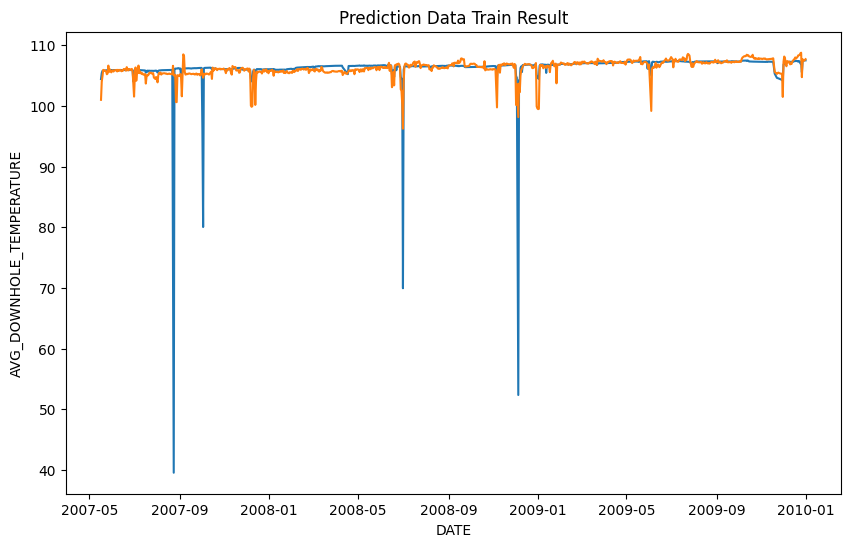

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=y_train.index, y=y_train, dashes=False)
sns.lineplot(x=y_train.index, y=train_predictions_scaled, dashes=False)
plt.title('Prediction Data Train Result')

### Visualization Model Result Test

Text(0.5, 1.0, 'Prediction Data Test Result')

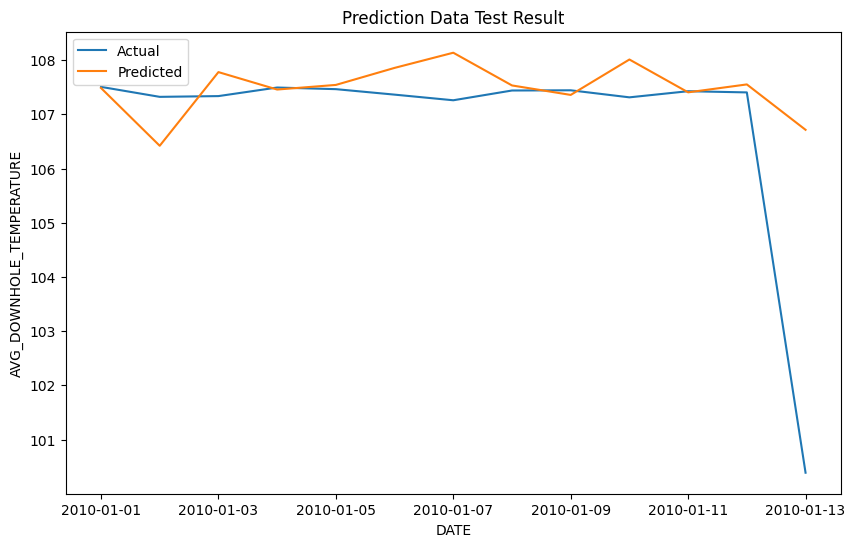

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=y_test.index, y=y_test, dashes=False,label='Actual')
sns.lineplot(x=y_test.index, y=predictions_scaled, dashes=False,label='Predicted')
plt.title('Prediction Data Test Result')

### Prediction Year 2011-2016

Text(0.5, 1.0, 'Prediction Year 2011-2016')

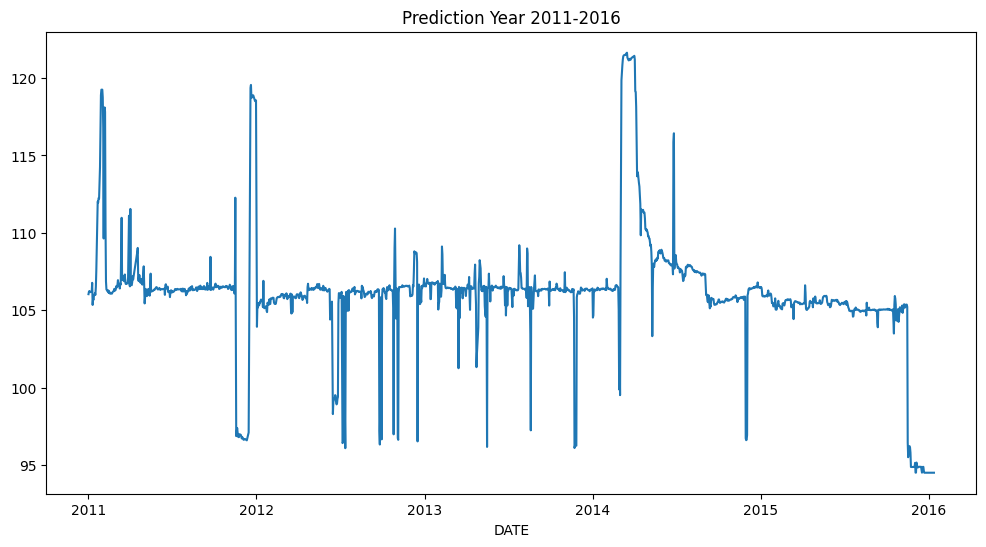

In [28]:
final_df = df[(df.index.year > 2010)]
final_test= final_df[feature_columns]

final_test_scaled = scaler.fit_transform(final_test)

final_predictions = model.predict(final_test_scaled)


plt.figure(figsize=(12, 6))
sns.lineplot(x=final_df.index, y=final_predictions)
plt.title('Prediction Year 2011-2016')

### Using PyCaret

In [29]:
from pycaret.regression import *

col_pycaret = df_eda.columns.difference(['DP_CHOKE_SIZE', 'AVG_WHP_P',"AVG_DOWNHOLE_PRESSURE"])
data_pycaret = train_data[col_pycaret]

exp = setup(data =data_pycaret,  target = 'AVG_DOWNHOLE_TEMPERATURE', session_id = 123)
add_metric('smape', 'SMAPE', calculate_smape,greater_is_better=False)
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,AVG_DOWNHOLE_TEMPERATURE
2,Target type,Regression
3,Original data shape,"(960, 11)"
4,Transformed data shape,"(960, 11)"
5,Transformed train set shape,"(672, 11)"
6,Transformed test set shape,"(288, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE,TT (Sec)
br,Bayesian Ridge,0.6660,11.2418,1.8021,0.0006,0.0215,0.0084,0.6952,0.0680
lasso,Lasso Regression,0.6791,11.3562,1.8220,-0.0478,0.0217,0.0085,0.7076,0.0610
llar,Lasso Least Angle Regression,0.6792,11.3563,1.8222,-0.0487,0.0217,0.0086,0.7078,0.1100
en,Elastic Net,0.7014,11.3377,1.8569,-0.1742,0.0220,0.0088,0.7287,0.0460
omp,Orthogonal Matching Pursuit,0.7819,11.8934,1.8993,-0.1950,0.0224,0.0095,0.8023,0.0730
dummy,Dummy Regressor,0.8021,11.9001,1.9097,-0.2260,0.0225,0.0097,0.8213,0.0230
ridge,Ridge Regression,0.7383,11.3697,1.9331,-0.4679,0.0228,0.0091,0.7639,0.0600
lr,Linear Regression,0.7383,11.3697,1.9331,-0.4680,0.0228,0.0091,0.7639,1.2930
lar,Least Angle Regression,0.8866,11.7126,2.0192,-0.6067,0.0235,0.0105,0.9034,0.0560
et,Extra Trees Regressor,0.4284,11.8752,1.9533,-1.4128,0.0232,0.0062,0.4751,0.2920


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [30]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,SMAPE
Fold,,,,,,,
0,0.0835,0.0457,0.2138,0.8404,0.0020,0.0008,0.0787
1,0.7426,24.4196,4.9416,-58.7792,0.0579,0.0070,0.8332
2,0.0764,0.0291,0.1705,0.9432,0.0016,0.0007,0.0722
3,0.1031,0.2044,0.4521,0.2335,0.0043,0.0010,0.0974
4,0.0862,0.0530,0.2302,0.8320,0.0022,0.0008,0.0813
5,0.1271,0.0831,0.2883,0.8520,0.0027,0.0012,0.1201
6,0.1594,0.6235,0.7896,-0.5164,0.0076,0.0015,0.1529
7,0.4389,6.1106,2.4720,-12.3410,0.0252,0.0041,0.4420
8,0.4684,10.1031,3.1785,0.0482,0.0340,0.0056,0.4928


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
pred_unseen = predict_model(rf, data = final_test)

Text(0.5, 1.0, 'Prediction Year 2011-2016 with Random Forest')

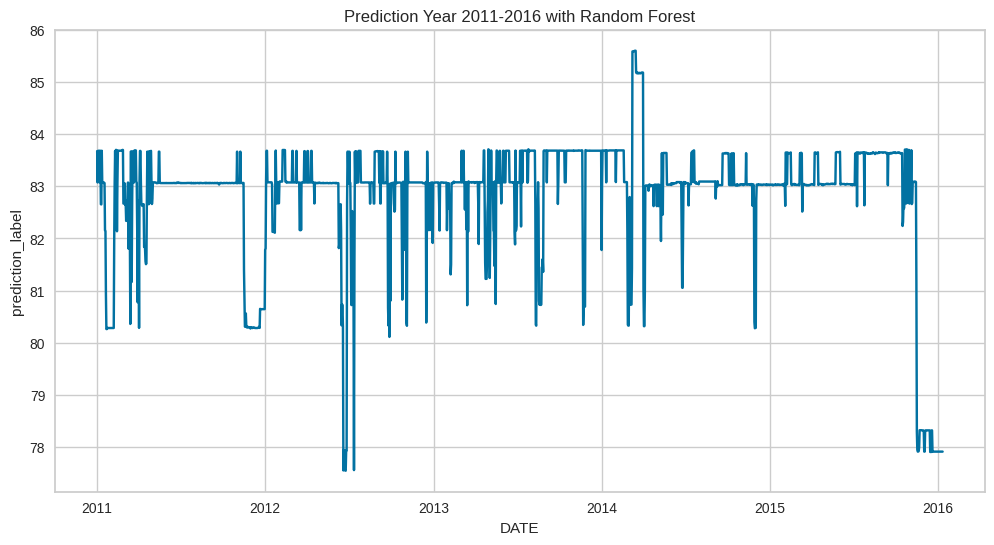

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=pred_unseen.index, y=pred_unseen['prediction_label'])
plt.title('Prediction Year 2011-2016 with Random Forest')